In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
train = pd.read_csv("'churn-bigml-80.csv'")
test = pd.read_csv("'churn-bigml-20.csv'")

In [56]:
train.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


Check for Duplicates


In [57]:
train[train.duplicated()]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


Investigate Account Length

In [58]:
train['Account length'].unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 141,  74, 168,  95,  62,
        85,  93,  76,  73,  77, 130, 132, 174,  57,  54,  20, 142, 172,
        12,  72,  78, 136, 149,  98, 135,  34, 160,  64,  59,  97,  52,
        60,  96,  87,  81, 125, 116,  38,  40,  43, 113, 126, 150, 138,
       162,  90,  50,  82, 144,  70,  55, 106,  94, 111,  80, 104,  99,
       120, 122, 157, 103,  36, 112,  46,  41, 193,  61,  92, 131, 163,
        91, 127, 110, 117, 140,  83, 145,  56, 151, 139, 115, 146, 185,
       148,  68, 179,  67,  19, 170, 164,  51,  63,  53, 105,  66,  86,
        35,  88, 123, 100, 108,  22,  33, 114,  24, 119, 101,  49,  48,
        71, 167, 166, 158, 196, 209,  16,  39, 173, 129, 143,  89,  44,
        79,  31,  37, 159, 194, 154,  45,  32,  21, 133,  25, 224,  58,
       155,  11, 109, 165,  18, 161, 124,  30, 176,  47, 190, 152,  65,
       186, 171, 102,  28, 153, 169,  13,  42, 189,  69,  27, 134, 156,
       243,  23, 205, 200,   5,   9, 178, 181, 182, 177, 210, 18

In [59]:
train.shape

(2666, 20)

In [60]:
train.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,2666,2666.000000,2666.000000,2666,2666,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,88,NaN,NaN,2396,1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2278
mean,NaN,100.620405,437.438860,NaN,NaN,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,NaN
std,NaN,39.563974,42.521018,NaN,NaN,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,408.000000,NaN,NaN,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,415.000000,NaN,NaN,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,NaN


Check Class Proportions

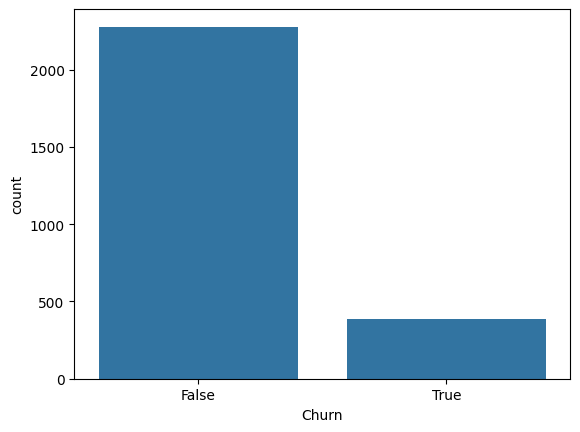

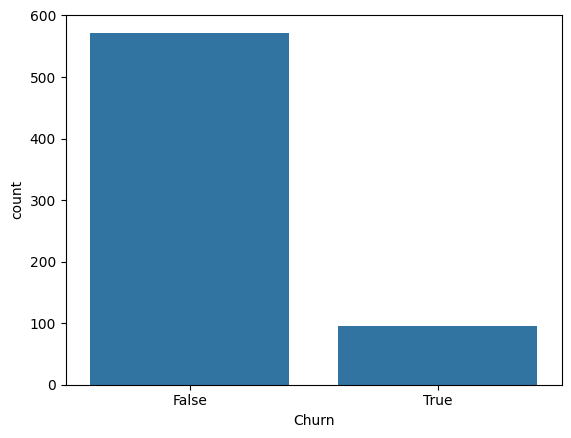

In [61]:
sns.countplot(x=train['Churn'])
plt.show()
sns.countplot(x=test['Churn'])
plt.show()

Check for Null Values

In [62]:
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [63]:
for i in train.columns:
    if train[i].dtype == 'object':
        print(i, train[i].unique())

State ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']
International plan ['No' 'Yes']
Voice mail plan ['Yes' 'No']


In [64]:
X_train = train.drop(columns='Churn')
y_train = train['Churn']

In [65]:
X_test = test.drop(columns='Churn')
y_test = test['Churn']

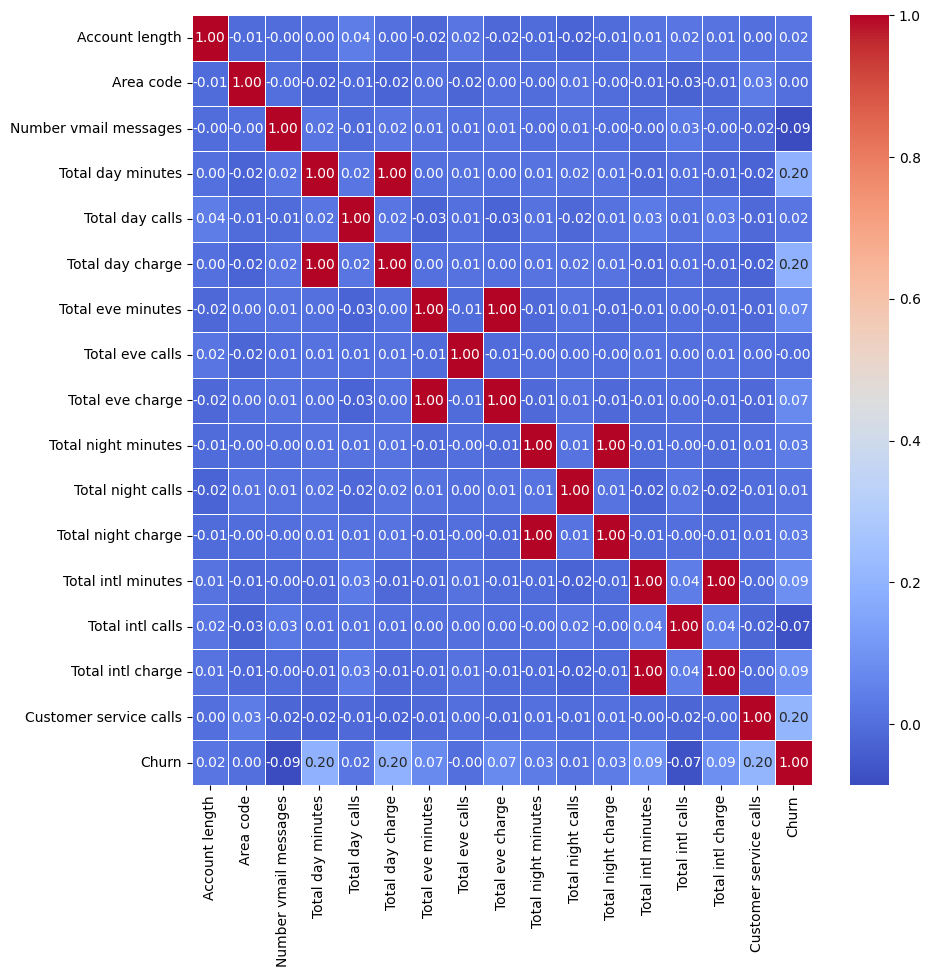

In [66]:
d = train.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(d, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

EDA

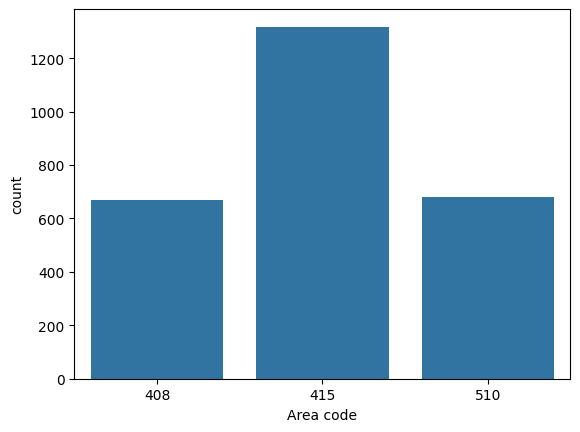

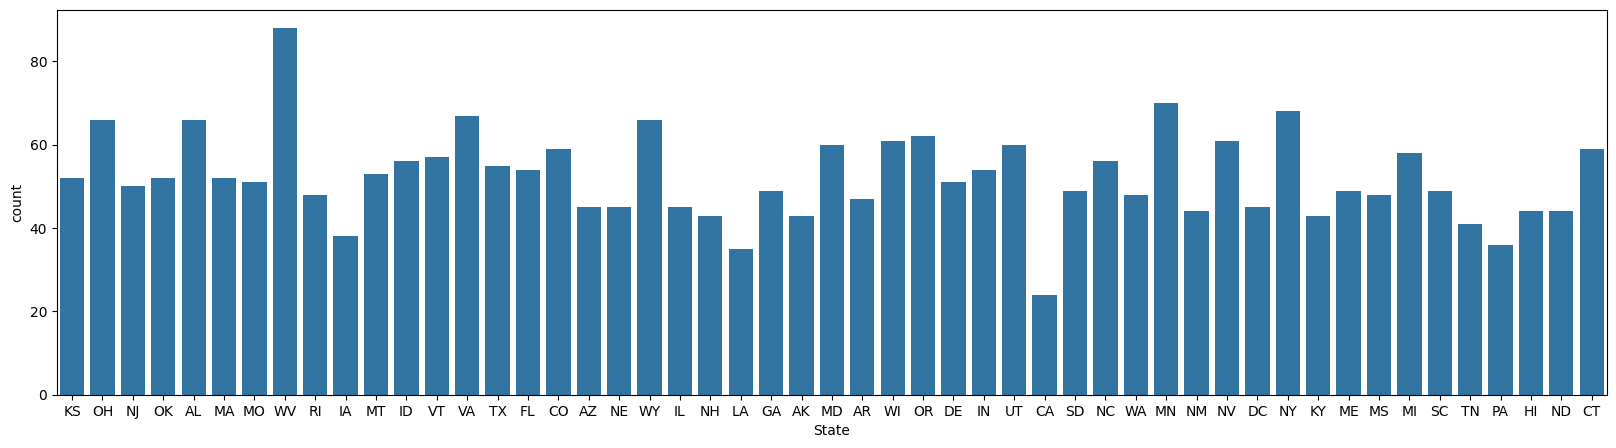

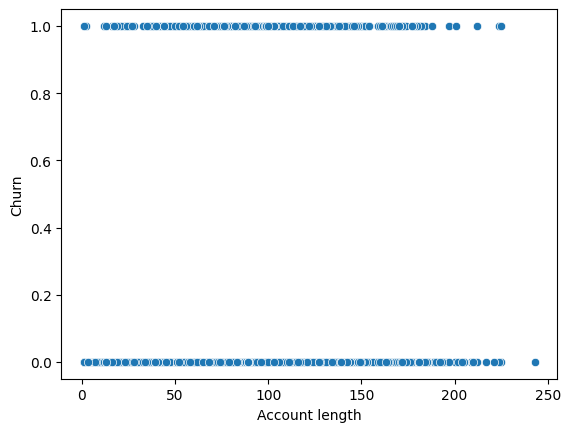

In [67]:
sns.countplot(x = train['Area code'])
plt.show()
plt.figure(figsize=(20,5))
sns.countplot(x = train['State'])
plt.show()
sns.scatterplot(x = train['Account length'], y = train['Churn'])
plt.show()

In [68]:
train['Total Charge'] = train['Total day charge'] + train['Total eve charge'] + train['Total night charge'] + train['Total intl charge']

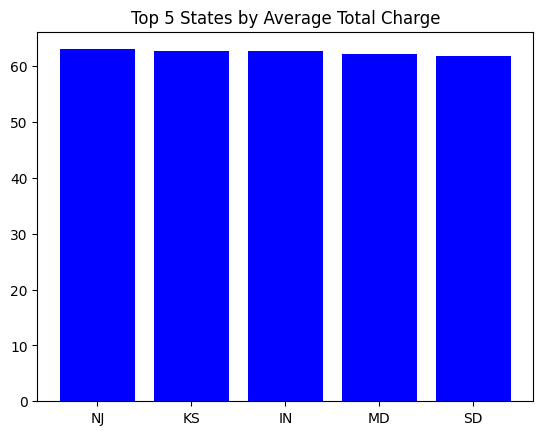

In [69]:
grouping = train.groupby('State')['Total Charge'].mean().reset_index()
grouping = grouping.sort_values(by='Total Charge', ascending=False)
plt.bar(grouping['State'][:5], grouping['Total Charge'][:5], color='blue', label='Total')
plt.title('Top 5 States by Average Total Charge')
plt.show()

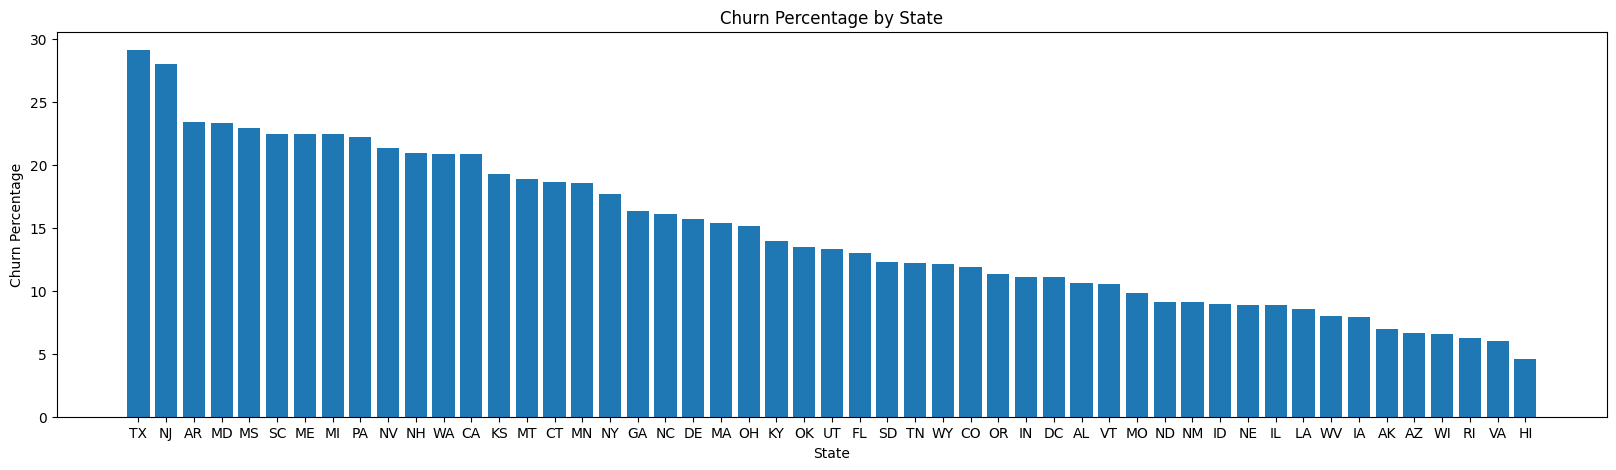

In [70]:

grouping= train.groupby('State').agg(
    Total_Customers = ('State', 'count'),
    Churned_Customers = ('Churn', lambda x : (x == True).sum())
)
grouping['Churn Percentage'] = grouping['Churned_Customers'] / grouping['Total_Customers'] * 100
grouping = grouping.sort_values(by='Churn Percentage', ascending=False)  
plt.figure(figsize=(20, 5))  
plt.bar(grouping.index, grouping['Churn Percentage'])
plt.xlabel('State')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by State')
plt.show()

Data Transformation and Preprocessing

In [71]:
encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
categorical = X_train.select_dtypes(include=['object'])
categorical = encoder.fit_transform(categorical)
X_train = pd.concat([X_train.select_dtypes(exclude=['object']), categorical], axis=1)
X_train.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
categorical = X_test.select_dtypes(include=['object'])
categorical = encoder.transform(categorical)
X_test = pd.concat([X_test.select_dtypes(exclude=['object']), categorical], axis=1)
X_test.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since there's a huge correlation between Total X minutes and Total X Charge, then one of them has to be dropped to avoid redundancy.
 
Account length and Area code don't provide value, so they will be dropped too.

In [73]:
X_train = X_train.drop(columns=['Account length', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'])

In [74]:
X_test = X_test.drop(columns=['Account length', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'])

In [75]:
X_train.head()

,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,243.4,114,121.2,110,162.6,104,12.2,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,299.4,71,61.9,88,196.9,89,6.6,7,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,166.7,113,148.3,122,186.9,121,10.1,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
X_test.head()

,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,129.1,137,228.5,83,208.8,111,12.7,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,332.9,67,317.8,97,160.6,128,5.4,9,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,110.4,103,137.3,102,189.6,105,7.7,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,119.3,117,215.1,109,178.7,90,11.1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 150, 200, 300], 'max_depth': [5, 10, 15]}
gscv = GridSearchCV(rf, param_grid, cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 150, 200, 300]})

In [63]:
gscv.best_params_, gscv.best_score_

({'max_depth': 15, 'n_estimators': 200}, 0.9268545650020027)

In [67]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()
param_grid = {'max_depth': [5, 6, 7, 8],
              'learning_rate': [0.1, 0.01, 0.5],
              'n_estimators': [100, 200, 300],
              'gamma': [0, 0.1, 0.2],}
xgb_gscv = GridSearchCV(xgb, param_grid, cv=5)
xgb_gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [5, 6, 7, 8],
                         'n_estimators': [100, 200, 300]})

In [68]:
xgb_gscv.best_params_, xgb_gscv.best_score_

({'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100},
 0.9572387236404776)

In [ ]:
xgb = XGBClassifier(gamma = 0.2, learning_rate = 0.1, max_depth = 8, n_estimators = 100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_predict = xgb.predict(X_test)

In [26]:
score = accuracy_score(y_test, y_predict)
print("The accuracy score of XGBoost is", score)

The accuracy score of XGBoost is 0.9565217391304348


In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       572
        True       0.90      0.78      0.84        95

    accuracy                           0.96       667
   macro avg       0.93      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



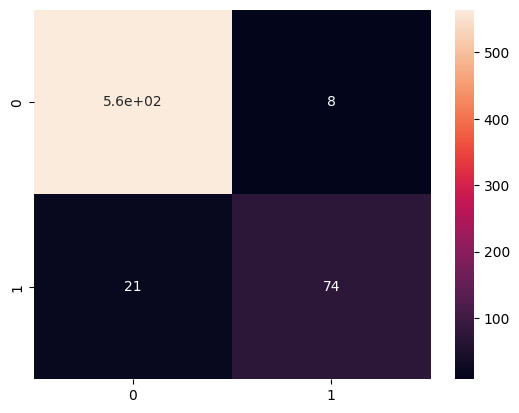

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
# !pip install graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 50), dpi=300) 
plot_tree(xgb, num_trees=0, ax = ax, rankdir='LR')
plt.show()